# **Weather Forecast Prediction**

## Data importation

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('weather_forecast_data.csv')

In [11]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Data Cleaning and Preprocessing

In [13]:
df.shape

(2500, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [15]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


### Encode the target variable 'Rain'

In [19]:
label_encoder = LabelEncoder()
df['Rain_encoded'] = label_encoder.fit_transform(df['Rain'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   2500 non-null   float64
 1   Humidity      2500 non-null   float64
 2   Wind_Speed    2500 non-null   float64
 3   Cloud_Cover   2500 non-null   float64
 4   Pressure      2500 non-null   float64
 5   Rain          2500 non-null   object 
 6   Rain_encoded  2500 non-null   int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 127.1+ KB


In [21]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Rain_encoded
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,0


## Exploratory Data Analysis

### Histogram for numeric features

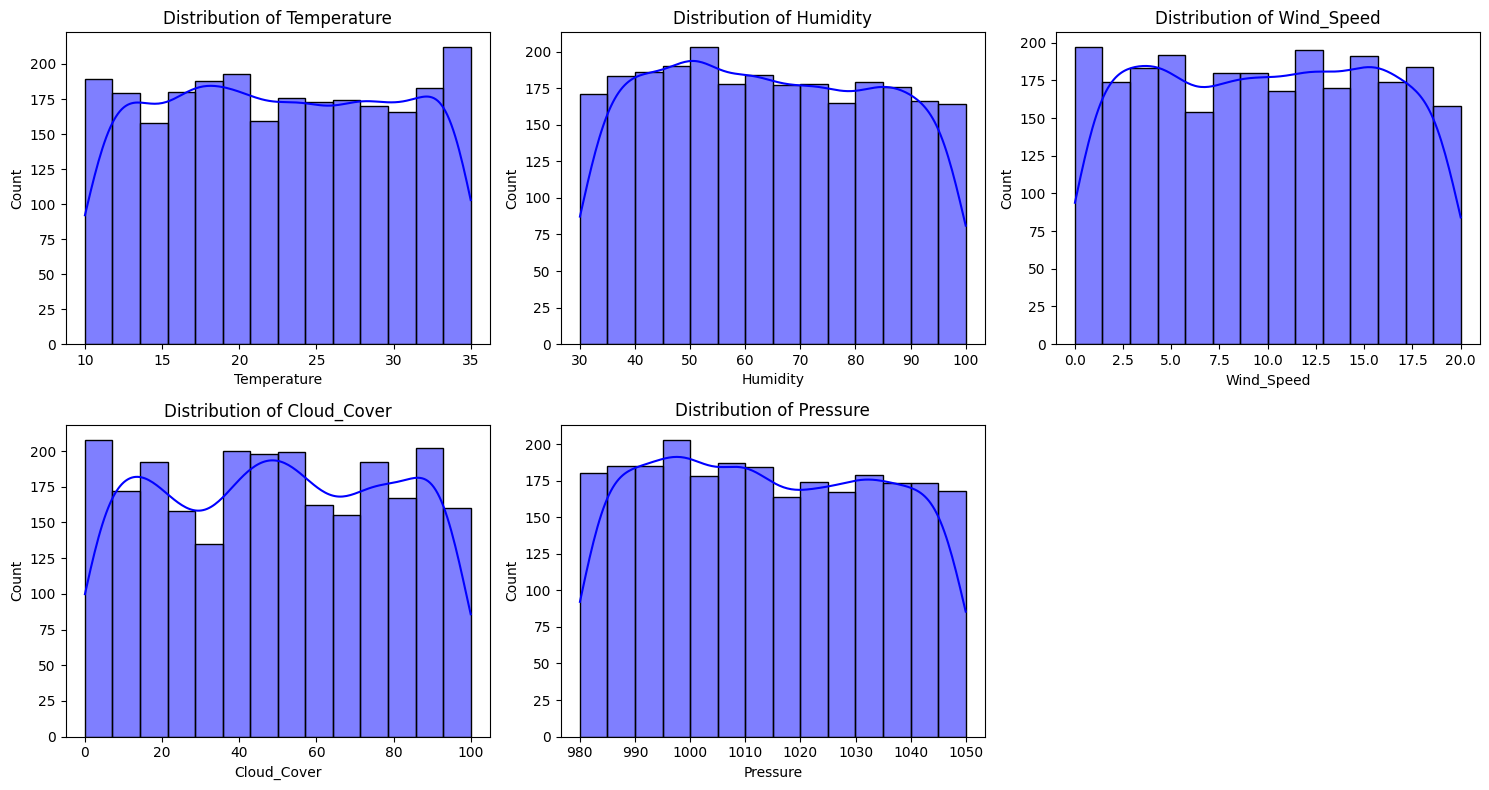

In [24]:
plt.figure(figsize=(15, 8))

# Histogram for Numeric Features
for i, column in enumerate(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

### Pairplot for relationships among numeric features and target

<Figure size 1500x800 with 0 Axes>

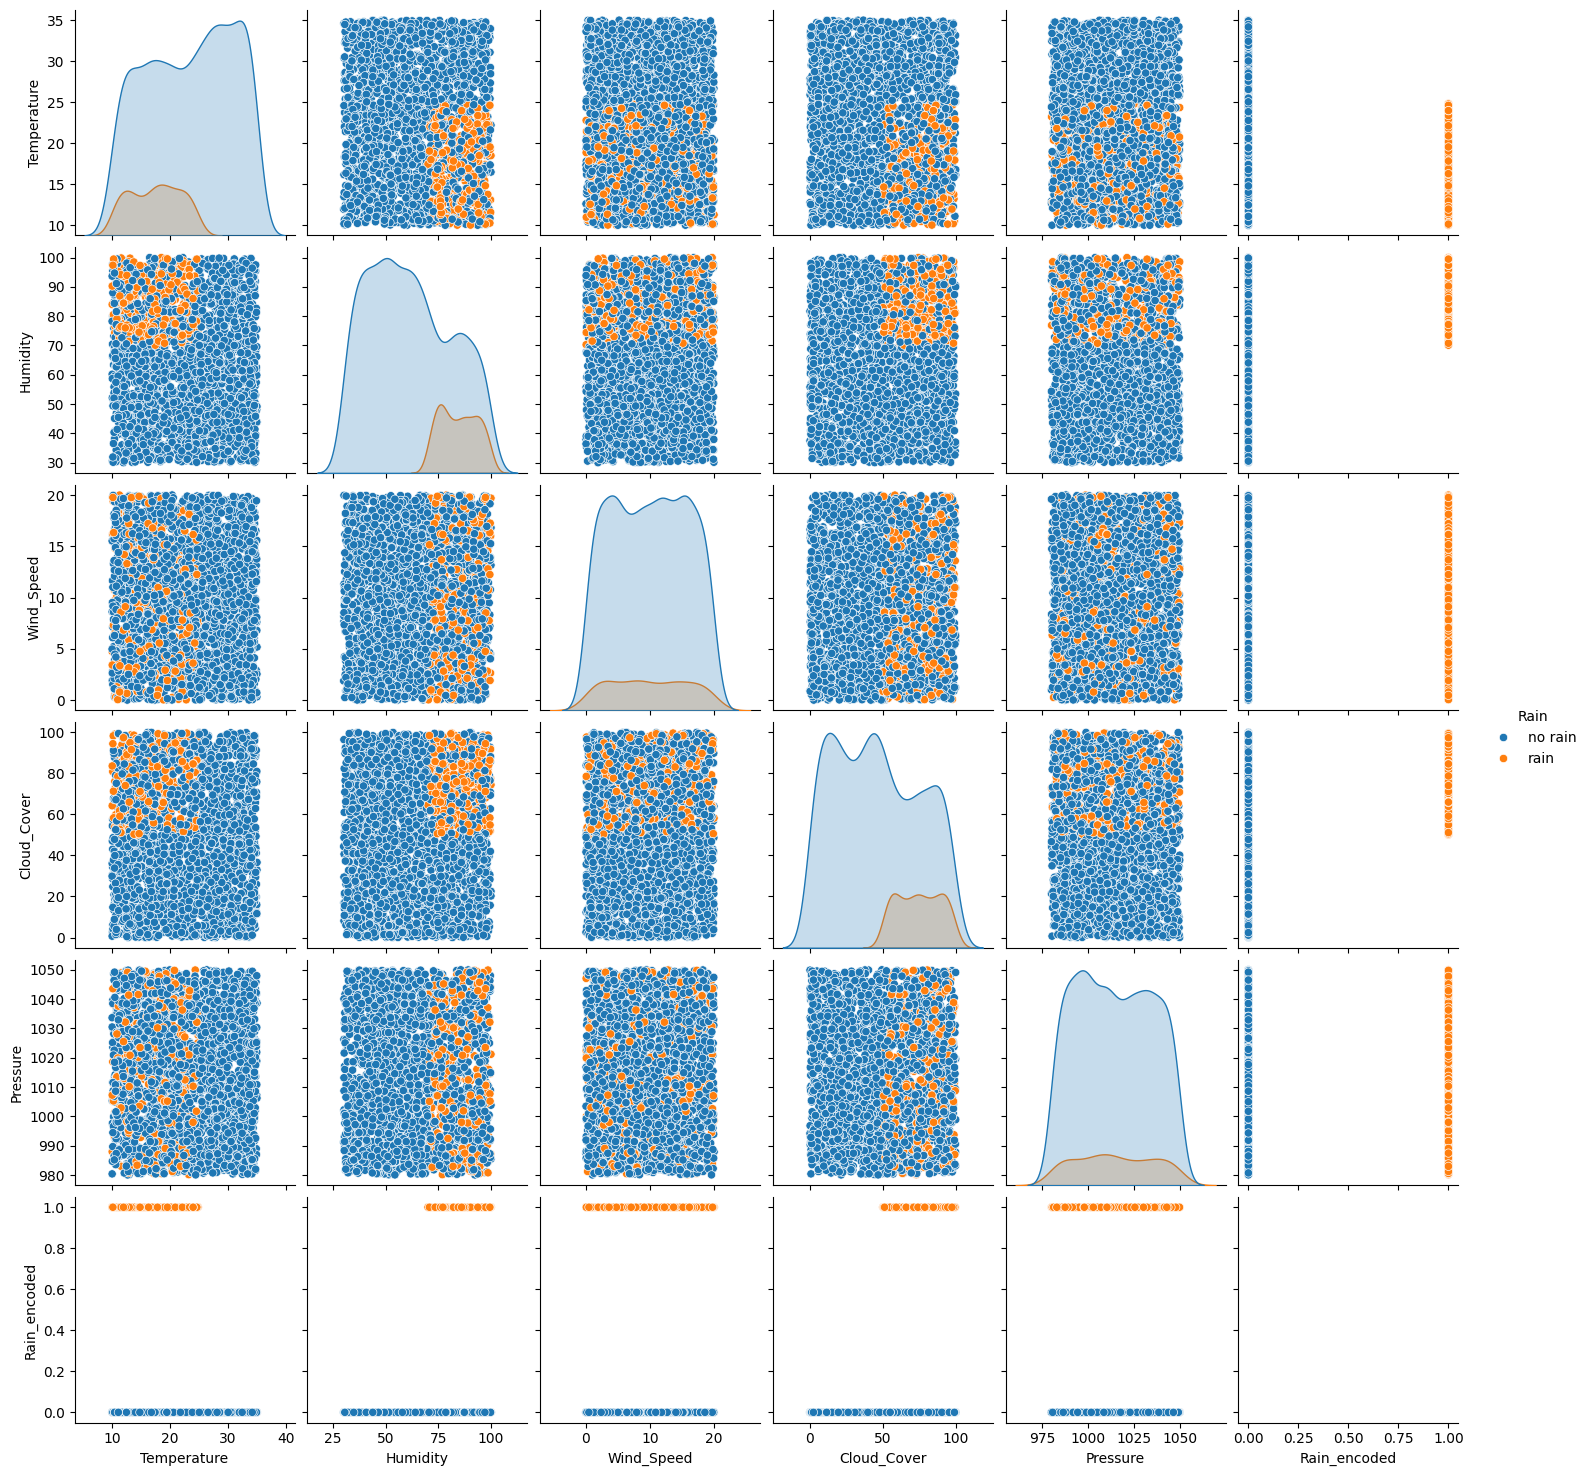

In [26]:
plt.figure(figsize=(15, 8))

# Pairplot for relationships among numeric features and target
df['Rain'] = df['Rain'].astype('category')
sns.pairplot(df, hue='Rain', diag_kind='kde')
plt.show()

### Correlation Heatmap

In [28]:
df1 = df.drop(columns=['Rain'])

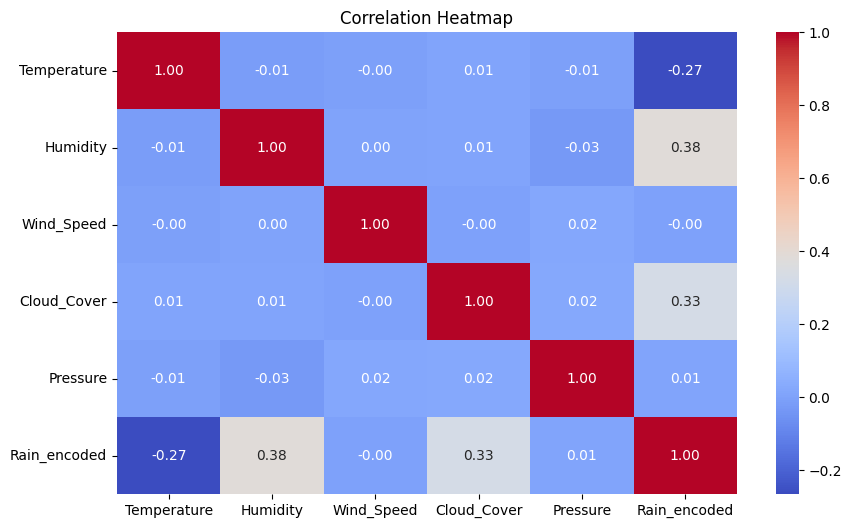

In [29]:
plt.figure(figsize=(10, 6))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Model Building

### Data splitting

In [82]:
df1

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_encoded
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


In [84]:
X = df1.drop(columns=df1.columns[-1])

In [86]:
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [94]:
y=df1['Rain_encoded']

In [96]:
y

0       1
1       0
2       0
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Rain_encoded, Length: 2500, dtype: int32

In [98]:
from sklearn.model_selection import train_test_split

# To Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
2055,10.001842,78.251648,4.980841,29.887058,1033.641741
1961,34.105244,32.844383,7.206672,94.151499,1027.991494
1864,15.240068,82.011602,10.695710,20.713915,1046.234092
2326,17.161616,76.483176,13.680669,55.915756,1041.597091
461,19.476422,93.112471,1.692415,52.228285,1028.830153
...,...,...,...,...,...
1638,26.825253,91.686792,8.058946,78.792732,1039.223895
1095,28.974614,58.618211,13.531515,67.976388,1025.789614
1130,10.051616,30.573940,9.517521,54.450577,997.630125
1294,10.619226,32.810852,16.924988,79.125241,1011.754684


In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y_rf_test_pred=rf.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix

In [110]:
cm=confusion_matrix(y_test, y_rf_test_pred)

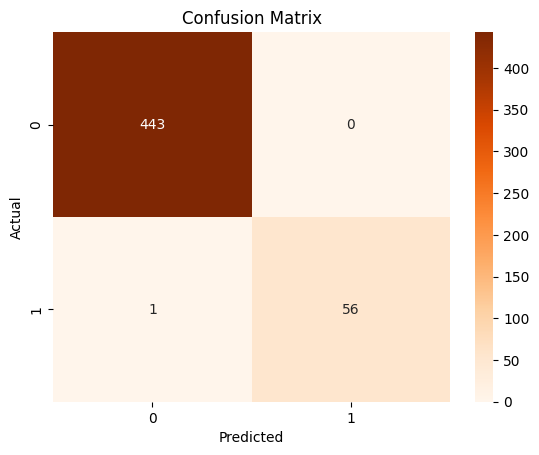

In [112]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics calculation
accuracy = accuracy_score(y_test, y_rf_test_pred)
precision = precision_score(y_test, y_rf_test_pred)
recall = recall_score(y_test, y_rf_test_pred)
f1 = f1_score(y_test, y_rf_test_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 0.98
F1 Score: 0.99
